# Proyek Analisis Data: Bike Sharing - Dataset
- **Nama:** Habib Fabri Arrosyid
- **Email:** habibarrsyd@gmail.com
- **ID Dicoding:** habibarrsyd

## Menentukan Pertanyaan Bisnis

- Apakah ada pola penggunaan yang menunjukkan jam-jam sibuk dan sepi untuk sistem penyewaan sepeda?
- Apakah ada pola penyewaan yang menunjukkan adanya anomali atau kejadian khusus berdasarkan kondisi cuaca dan musim pada penyewaan harian?
- Bagaimana pola penggunaan sepeda antara pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_hour = pd.read_csv('data/hour.csv')
df_day = pd.read_csv('data/day.csv')


In [3]:
# Menggabungkan dataset berdasarkan kolom 'dteday' dan 'yr' serta 'mnth' untuk memastikan kecocokan
df_merged = df_hour.merge(df_day, on=['dteday', 'yr', 'mnth'], suffixes=('_hour', '_day'))

# Menampilkan 5 data pertama
print(df_merged.head())


   instant_hour      dteday  season_hour  yr  mnth  hr  holiday_hour  \
0             1  2011-01-01            1   0     1   0             0   
1             2  2011-01-01            1   0     1   1             0   
2             3  2011-01-01            1   0     1   2             0   
3             4  2011-01-01            1   0     1   3             0   
4             5  2011-01-01            1   0     1   4             0   

   weekday_hour  workingday_hour  weathersit_hour  ...  weekday_day  \
0             6                0                1  ...            6   
1             6                0                1  ...            6   
2             6                0                1  ...            6   
3             6                0                1  ...            6   
4             6                0                1  ...            6   

   workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0               0               2  0.344167   0.363625  0.805833   
1   

In [4]:
df_merged.columns

Index(['instant_hour', 'dteday', 'season_hour', 'yr', 'mnth', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'instant_day', 'season_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day',
       'registered_day', 'cnt_day'],
      dtype='object')

In [5]:
df_merged.shape

(17379, 30)

In [6]:
df_merged.to_csv('merged.csv')

In [7]:
# pilih fitur 
df_season = df_day[['cnt','season','weekday','workingday','weathersit']]

In [8]:
df_jam = df_hour[['hr','cnt','weekday','workingday']]
df_jam

,hr,cnt,weekday,workingday
0,0,16,6,0
1,1,40,6,0
2,2,32,6,0
3,3,13,6,0
4,4,1,6,0
...,...,...,...,...
17374,19,119,1,1
17375,20,89,1,1
17376,21,90,1,1
17377,22,61,1,1


**Insight:**
- Dilakukan penggabungan pada kedua dataset
- Total kolom setelah dimerged menjadi 30 kolom
- Proses pengolahan akan berfokus pada pola harian dan jam sehingga penggunaan dataset berfokus pada 2 dataset awal

### Assessing Data

In [9]:
df_season.isnull().sum()

cnt           0
season        0
weekday       0
workingday    0
weathersit    0
dtype: int64

In [10]:
df_season.duplicated().sum()

0

In [11]:
df_jam.isnull().sum()

hr            0
cnt           0
weekday       0
workingday    0
dtype: int64

In [12]:
df_jam.duplicated().sum()

4602

In [13]:
df_jam

,hr,cnt,weekday,workingday
0,0,16,6,0
1,1,40,6,0
2,2,32,6,0
3,3,13,6,0
4,4,1,6,0
...,...,...,...,...
17374,19,119,1,1
17375,20,89,1,1
17376,21,90,1,1
17377,22,61,1,1


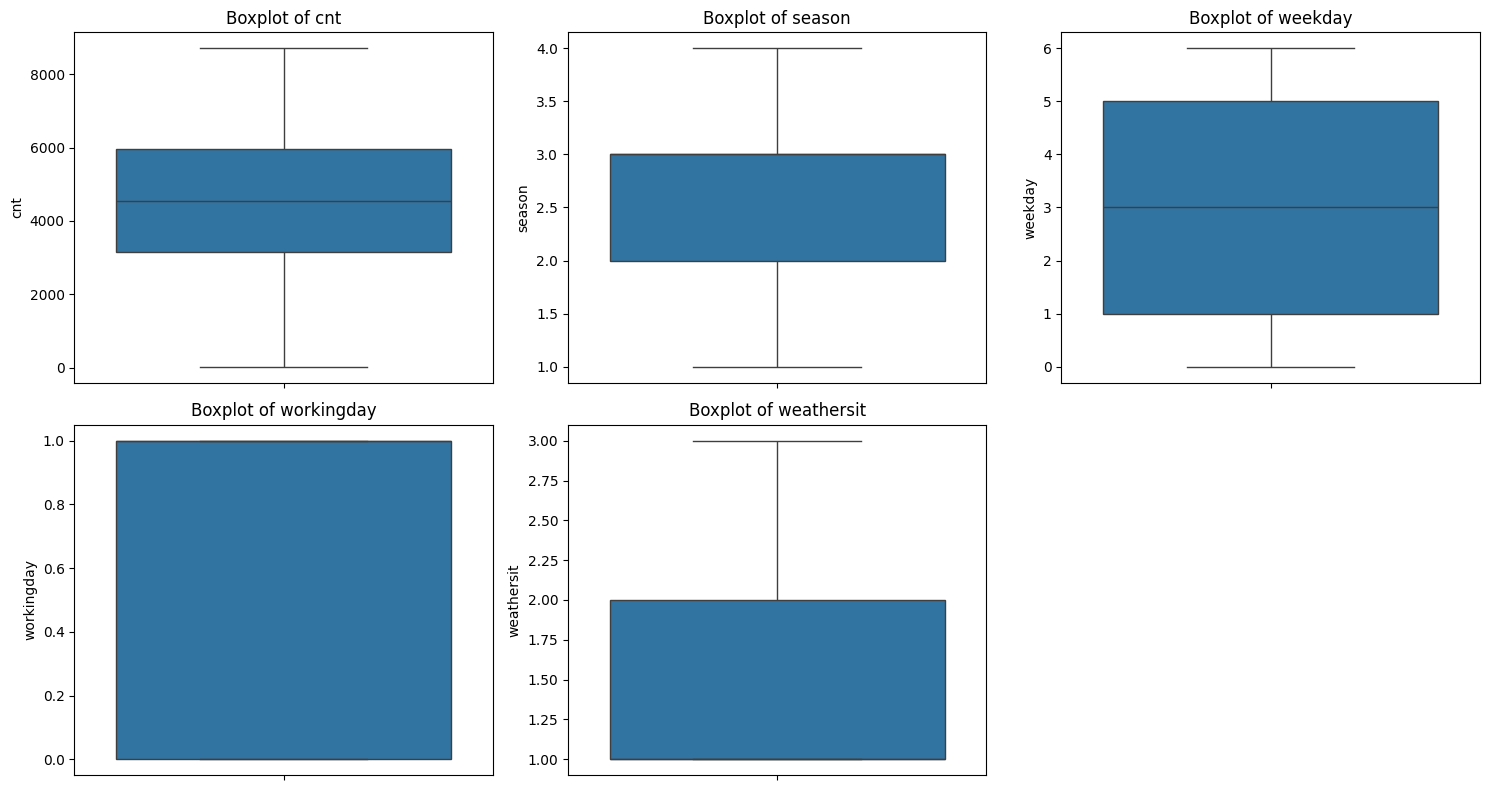

In [14]:
# Mengatur ukuran figure
plt.figure(figsize=(15, 8))

# Loop melalui setiap kolom dalam dataset
df_select_day_numeric = df_season.select_dtypes(include=['number']) # Hanya kolom numerik
for i, col in enumerate(df_select_day_numeric.columns, 1):
    plt.subplot(2, (len(df_select_day_numeric.columns) + 1) // 2, i)
    sns.boxplot(y=df_select_day_numeric[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()

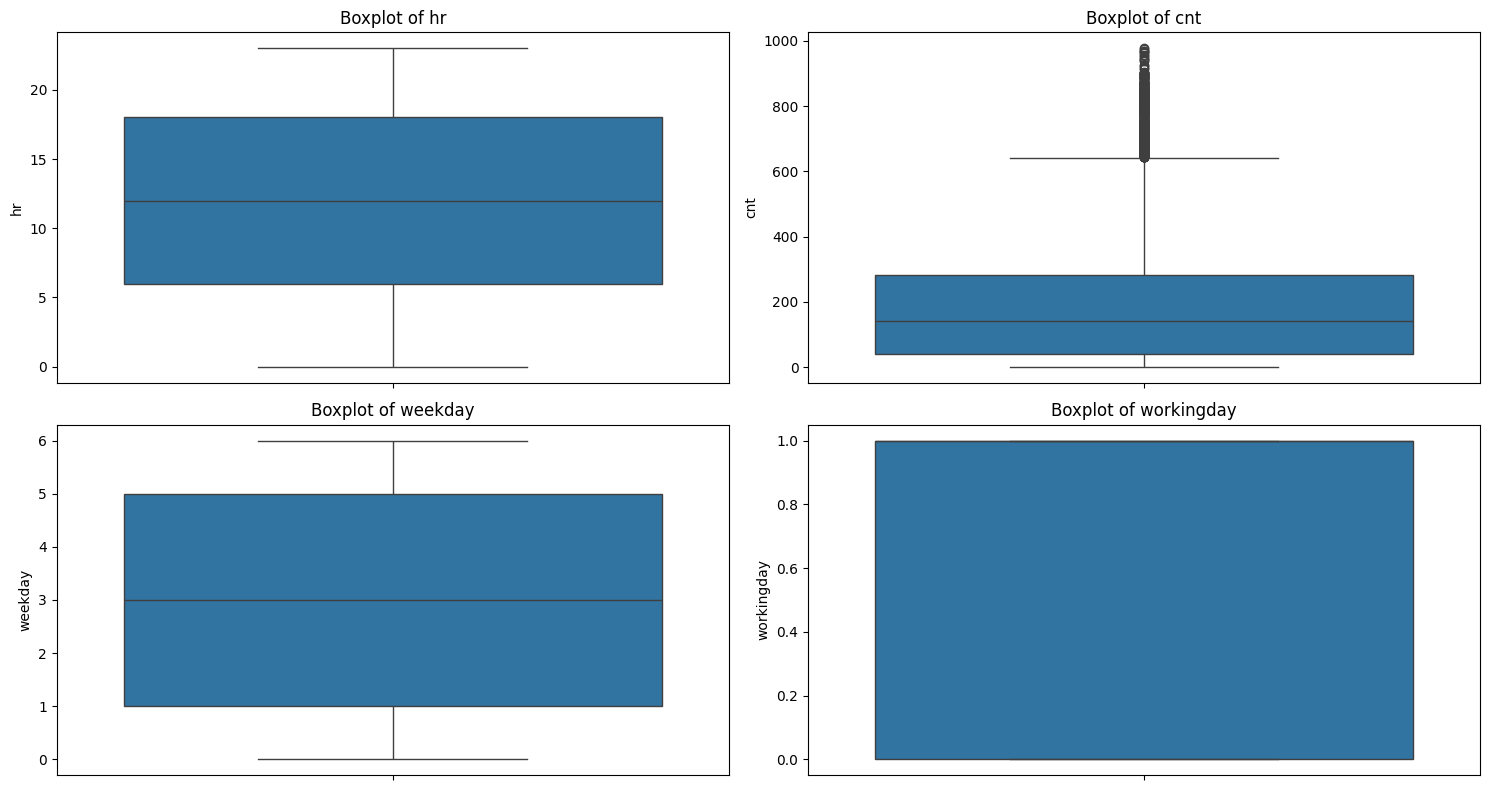

In [15]:
# Mengatur ukuran figure
plt.figure(figsize=(15, 8))

# Loop melalui setiap kolom dalam dataset
df_select_hour_numeric = df_jam.select_dtypes(include=['number']) # Hanya kolom numerik
for i, col in enumerate(df_select_hour_numeric.columns, 1):
    plt.subplot(2, (len(df_select_hour_numeric.columns) + 1) // 2, i)
    sns.boxplot(y=df_select_hour_numeric[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()

**Insight:**
- df_jam tidak terdapat kolom kosong, tetapi memiliki elemen duplikat sebanyak 4602 baris sehingga wajib diatasi saat proses cleaning data
- df_season tidak terdapat kolom kosong, tidak terdapat elemen baris yang duplikat 
- Pada boxplot visualisasi dari dataset df_season tampak tidak ada outlier 
- Pada boxplot visualisasi dari dataset df_season harus dianalisa terlebih dahulu apakah outlier alami atau selainnya.

### Cleaning Data

In [16]:
df_jam_cleans = df_jam.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_32632\2970024580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jam_cleans = df_jam.drop_duplicates(inplace=True)


In [17]:
df_jam.duplicated().sum()

0

In [18]:
df_jam

,hr,cnt,weekday,workingday
0,0,16,6,0
1,1,40,6,0
2,2,32,6,0
3,3,13,6,0
4,4,1,6,0
...,...,...,...,...
17374,19,119,1,1
17375,20,89,1,1
17376,21,90,1,1
17377,22,61,1,1


In [19]:
# Menghitung IQR
Q1 = df_jam["cnt"].quantile(0.25)
Q3 = df_jam["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers = df_jam[(df_jam["cnt"] < lower_bound) | (df_jam["cnt"] > upper_bound)]

# Mencetak jumlah dan nilai outlier
print(f"Jumlah outlier pada kolom 'cnt': {outliers.shape[0]}")
print("Nilai outlier:")
print(outliers["cnt"].values)

Jumlah outlier pada kolom 'cnt': 374
Nilai outlier:
[712 734 782 749 713 746 686 690 679 685 721 801 750 801 729 779 810 801
 957 830 686 684 703 681 729 757 800 684 744 759 822 698 692 744 704 738
 678 678 681 712 781 775 748 776 700 819 691 732 709 702 683 681 743 813
 704 706 769 680 717 710 705 732 770 779 678 733 873 846 852 868 745 812
 704 730 785 785 719 692 798 752 839 796 693 827 785 694 679 702 684 686
 678 834 822 710 850 790 724 782 681 869 813 793 723 800 831 713 857 744
 719 867 823 823 693 723 811 795 691 833 791 900 824 687 843 804 705 697
 747 730 722 689 849 872 872 819 830 814 702 795 825 713 835 755 794 770
 772 679 771 777 691 715 738 847 741 743 869 877 788 913 891 698 729 738
 688 699 751 827 812 760 820 857 681 837 739 865 767 741 858 843 705 868
 814 737 858 862 686 698 811 730 818 812 854 682 851 848 682 897 832 791
 893 815 723 878 740 783 683 707 820 941 744 736 699 845 834 693 864 818
 808 870 812 754 844 853 690 856 839 725 863 839 808 835 719 772 792 694

In [20]:
df_jam['cnt'].describe()

count    12777.000000
mean       227.537372
std        183.963108
min          1.000000
25%         85.000000
50%        184.000000
75%        322.000000
max        977.000000
Name: cnt, dtype: float64

**Insight:**
- Pada df_jam telah berhasil dihapus data yang memiliki duplikat pada sebelumnya
- Meskipun terlihat ada outlier pada kolom cnt tersebut akan tetapi itu adalah data alami bukan karena kesalahan input, sehingga dapat dianalisa untuk mengecek suatu pola tertentu

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
df_season.describe(include='all')

,cnt,season,weekday,workingday,weathersit
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4504.348837,2.496580,2.997264,0.683995,1.395349
std,1937.211452,1.110807,2.004787,0.465233,0.544894
min,22.000000,1.000000,0.000000,0.000000,1.000000
25%,3152.000000,2.000000,1.000000,0.000000,1.000000
50%,4548.000000,3.000000,3.000000,1.000000,1.000000
75%,5956.000000,3.000000,5.000000,1.000000,2.000000
max,8714.000000,4.000000,6.000000,1.000000,3.000000


In [22]:
df_jam.describe(include='all')

,hr,cnt,weekday,workingday
count,12777.000000,12777.000000,12777.000000,12777.000000
mean,13.053299,227.537372,3.000391,0.669954
std,6.286650,183.963108,2.018601,0.470248
min,0.000000,1.000000,0.000000,0.000000
25%,8.000000,85.000000,1.000000,0.000000
50%,13.000000,184.000000,3.000000,1.000000
75%,18.000000,322.000000,5.000000,1.000000
max,23.000000,977.000000,6.000000,1.000000


array([[<Axes: title={'center': 'cnt'}>,
        <Axes: title={'center': 'season'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>, <Axes: >]], dtype=object)

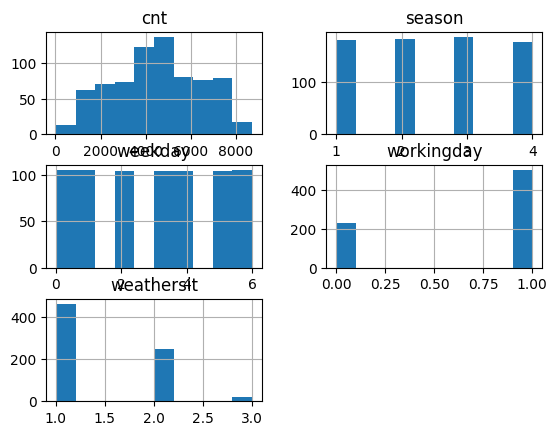

In [26]:
df_season.hist()

In [23]:
df_season.corr()

,cnt,season,weekday,workingday,weathersit
cnt,1.000000,0.406100,0.067443,0.061156,-0.297391
season,0.406100,1.000000,-0.003080,0.012485,0.019211
weekday,0.067443,-0.003080,1.000000,0.035790,0.031087
workingday,0.061156,0.012485,0.035790,1.000000,0.061200
weathersit,-0.297391,0.019211,0.031087,0.061200,1.000000


array([[<Axes: title={'center': 'hr'}>, <Axes: title={'center': 'cnt'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>]], dtype=object)

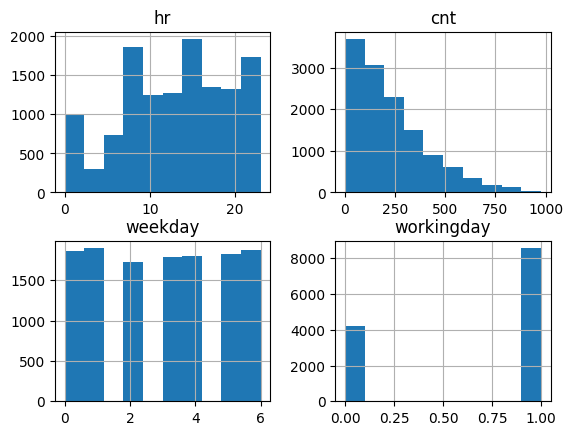

In [28]:
df_jam.hist()

In [24]:
df_jam.corr()

,hr,cnt,weekday,workingday
hr,1.000000,0.245399,0.008004,0.048631
cnt,0.245399,1.000000,0.029538,0.058881
weekday,0.008004,0.029538,1.000000,0.040870
workingday,0.048631,0.058881,0.040870,1.000000


Analisis EDA agregasi untuk Pertanyaan Pertama

In [25]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
hourly_workingday = df_hour[df_hour["workingday"] == 1].groupby("hr")["cnt"].mean()
hourly_weekend = df_hour[df_hour["workingday"] == 0].groupby("hr")["cnt"].mean()

Analisis EDA agregasi untuk Pertanyaan Kedua

In [57]:
# Agregasi data: Menghitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca dan musim
agg_data = df_season.groupby(["season","weathersit"])["cnt"].mean().reset_index()

Analisis EDA agregasi untuk Pertanyaan Ketiga

In [26]:
# Membuat kategori waktu berdasarkan jam (untuk dataset 'hour.csv' gunakan kolom 'hr')
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Pagi (00-06)'
    elif 6 <= hour < 12:
        return 'Siang (06-12)'
    elif 12 <= hour < 18:
        return 'Sore (12-18)'
    else:
        return 'Malam (18-24)'


# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
df_day['day_type'] = df_day['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

# Menghitung total penyewaan berdasarkan kategori
agg_data = df_day.groupby(['day_type'])[['casual', 'registered']].sum().reset_index()

# Menghitung persentase masing-masing kategori pengguna
agg_data['casual_pct'] = (agg_data['casual'] / (agg_data['casual'] + agg_data['registered'])) * 100
agg_data['registered_pct'] = (agg_data['registered'] / (agg_data['casual'] + agg_data['registered'])) * 100

**Insight:**
- Pada proses eda ini dilakukan dengan cara melihat statistik deskriptif dari kolom - kolom dataset
- Analisa pembentukan dari histogram tiap data untuk melihat persebaran data pada tiap kolom
- Melihat korelasi antar variabel 
- Membuat analisa agregasi pada tiap pertanyaan yang nantinya akan divisualisasikan pada bagian visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola penggunaan yang menunjukkan jam-jam sibuk dan sepi untuk sistem penyewaan sepeda?


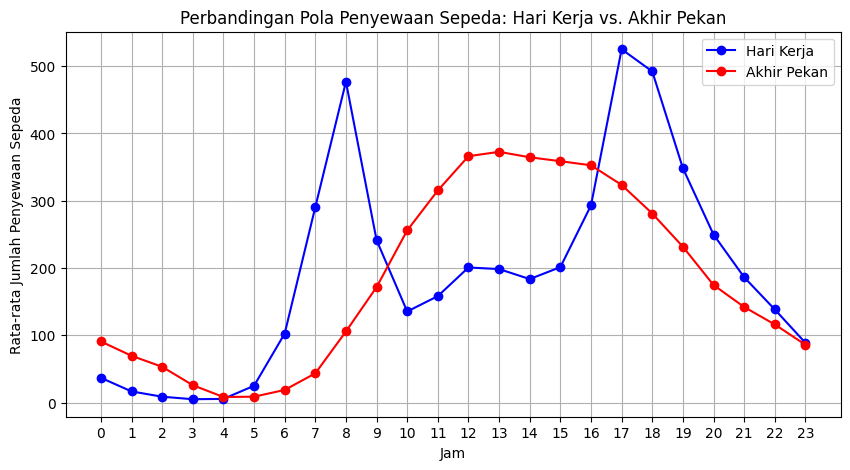

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_workingday.index, hourly_workingday.values, marker="o", linestyle="-", color="blue", label="Hari Kerja")
plt.plot(hourly_weekend.index, hourly_weekend.values, marker="o", linestyle="-", color="red", label="Akhir Pekan")
plt.xticks(range(0, 24))
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Perbandingan Pola Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan")
plt.legend()
plt.grid()
plt.show()

### Pertanyaan 2: Apakah ada pola penyewaan yang menunjukkan adanya anomali atau kejadian khusus berdasarkan kondisi cuaca dan musim pada penyewaan harian?


C:\Users\user\AppData\Local\Temp\ipykernel_32632\3547366396.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.barplot(data=agg_data, x="season", y="cnt", hue="weathersit",


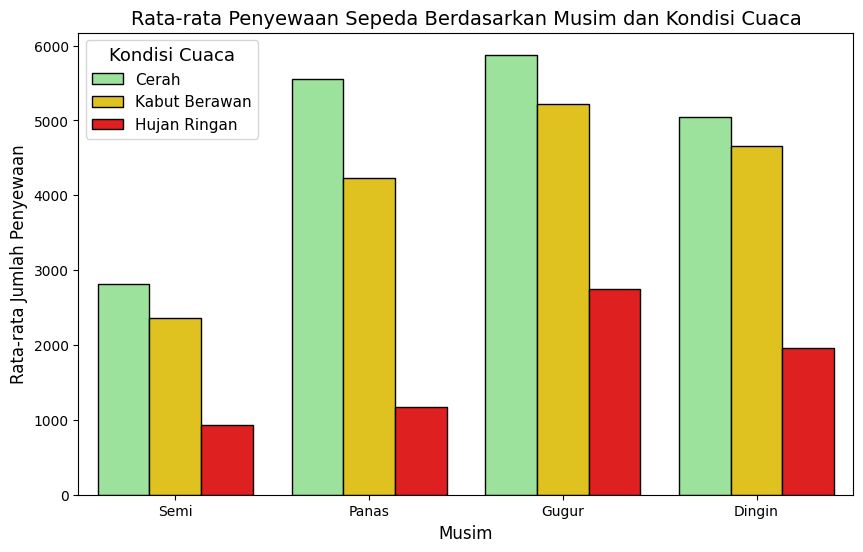

In [56]:
# Atur ukuran figure
plt.figure(figsize=(10, 6))

# Buat barplot menggunakan seaborn
ax = sns.barplot(data=agg_data, x="season", y="cnt", hue="weathersit",
                 palette=["lightgreen", "gold", "red", "darkred"], edgecolor="black")

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)

# Mengatur label sumbu X agar lebih informatif
plt.xticks(ticks=[0, 1, 2, 3], labels=["Semi", "Panas", "Gugur", "Dingin"])

# Ambil legend handles dan ubah labelnya agar warna tetap ada
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Cerah", "Kabut Berawan", "Hujan Ringan"]
plt.legend(handles, new_labels, title="Kondisi Cuaca", title_fontsize="13", fontsize="11")

# Tampilkan plot
plt.show()

### Pertanyaan 3 : Bagaimana pola penggunaan sepeda antara pengguna kasual dan terdaftar?

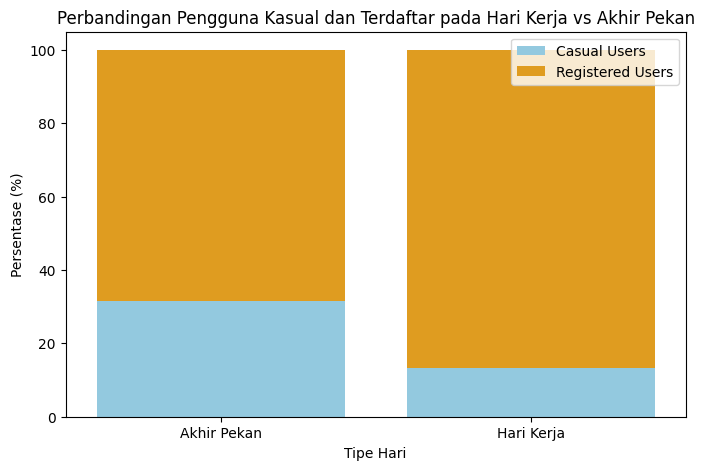

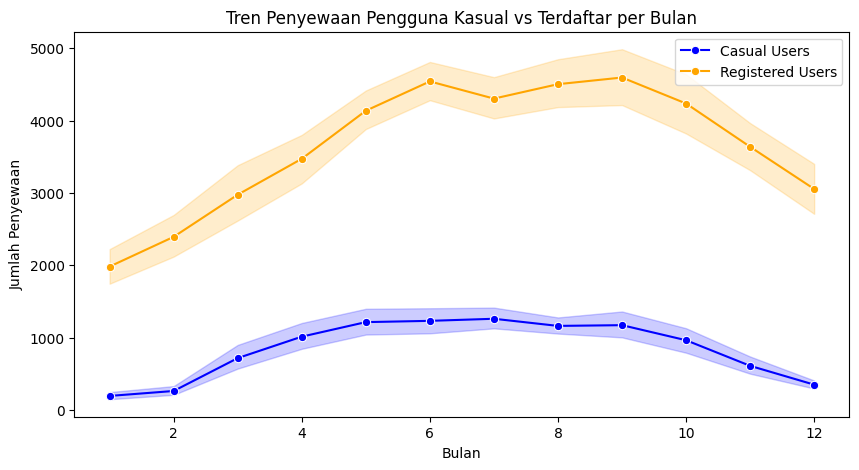

In [28]:
# 📊 **Visualisasi 1: Stacked Bar Chart - Perbandingan Casual vs Registered**
plt.figure(figsize=(8,5))
sns.barplot(x="day_type", y="casual_pct", data=agg_data, color='skyblue', label="Casual Users")
sns.barplot(x="day_type", y="registered_pct", data=agg_data, color='orange', bottom=agg_data["casual_pct"], label="Registered Users")

plt.xlabel("Tipe Hari")
plt.ylabel("Persentase (%)")
plt.title("Perbandingan Pengguna Kasual dan Terdaftar pada Hari Kerja vs Akhir Pekan")
plt.legend()
plt.show()

# 📊 **Visualisasi 2: Line Chart - Tren Penyewaan Casual vs Registered**
plt.figure(figsize=(10,5))
sns.lineplot(data=df_day, x="mnth", y="casual", label="Casual Users", marker="o", color='blue')
sns.lineplot(data=df_day, x="mnth", y="registered", label="Registered Users", marker="o", color='orange')

plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.title("Tren Penyewaan Pengguna Kasual vs Terdaftar per Bulan")
plt.legend()
plt.show()

**Insight:**
- Pertanyaan 1 : 
Jam Sibuk (Peak Hours) Hari kerja:

Pagi (07:00 - 09:00) → Lonjakan besar, mencapai puncak sekitar pukul 08:00. Ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk perjalanan ke tempat kerja atau sekolah.

Sore (17:00 - 19:00) → Puncak lain terjadi sekitar 18:00, yang mencerminkan perjalanan pulang dari kantor/sekolah. 
Akhir pekan:

Siang hingga sore (10:00 - 17:00) → Aktivitas penyewaan meningkat secara bertahap dan tetap tinggi hingga sore hari. Tidak ada lonjakan tajam seperti di hari kerja, tetapi penggunaannya lebih stabil.

Jam Sepi (Off-Peak Hours)

Dini hari hingga pagi (00:00 - 05:00) → Penggunaan sangat rendah di kedua kategori, karena jam ini biasanya bukan waktu perjalanan utama.
Hari kerja antara jam 09:00 - 16:00 → Penyewaan cenderung lebih rendah dibandingkan jam sibuk pagi dan sore, menunjukkan bahwa sebagian besar pengguna sudah berada di tempat kerja atau sekolah.

- Pertanyaan 2 :

1. Cuaca Cerah Mendorong Penyewaan Tertinggi 

Jumlah penyewaan sepeda selalu tertinggi dalam kondisi cerah, terlepas dari musim.
Ini menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda sebagai moda transportasi atau rekreasi saat cuaca mendukung.

2. Musim Panas dan Gugur Adalah Puncak Penyewaan 

Penyewaan sepeda mencapai puncaknya pada musim panas dan gugur, terutama saat cuaca cerah.
Hal ini bisa disebabkan oleh liburan musim panas, cuaca yang lebih nyaman, dan kemungkinan lebih banyak orang yang beraktivitas di luar ruangan.

3. Musim Dingin Memiliki Penyewaan yang Relatif Tinggi 

Meskipun cuaca dingin biasanya mengurangi aktivitas luar ruangan, penyewaan sepeda tetap cukup tinggi, terutama dalam kondisi cerah dan kabut berawan.
Ini bisa menunjukkan bahwa pengguna di musim dingin lebih didominasi oleh komuter (pengguna harian) daripada pengguna rekreasi.


4. Hujan Ringan Menyebabkan Penurunan Signifikan 

Saat hujan ringan, jumlah penyewaan turun drastis di semua musim, tetapi penurunannya tidak terlalu tajam di musim gugur dibandingkan musim lainnya.
Ini bisa mengindikasikan bahwa di musim gugur, pengguna mungkin lebih siap menghadapi hujan ringan, atau ada faktor lain seperti frekuensi hujan yang lebih tinggi di musim lain yang menyebabkan dampak lebih besar.

5. Perbedaan Tajam antara Musim Semi dan Panas 

Terdapat perbedaan besar dalam jumlah penyewaan antara musim semi dan musim panas, terutama dalam kondisi cerah dan kabut berawan.
Hal ini bisa menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda dibandingkan saat suhu masih relatif dingin di musim semi.

- Pertanyaan 3 : 

1. Perbandingan Pengguna Kasual vs Terdaftar pada Hari Kerja vs Akhir Pekan (Grafik 1)

Pada hari kerja, mayoritas penyewaan sepeda dilakukan oleh pengguna terdaftar, sementara pengguna kasual hanya menyumbang bagian kecil.

Pada akhir pekan, proporsi pengguna kasual meningkat secara signifikan, meskipun pengguna terdaftar masih mendominasi.

Insight:

Pengguna terdaftar cenderung menggunakan sepeda untuk keperluan rutin, seperti komuter harian.
Pengguna kasual lebih banyak menggunakan sepeda pada akhir pekan, kemungkinan untuk rekreasi atau aktivitas santai.

2. Tren Penyewaan Pengguna Kasual vs Terdaftar per Bulan (Grafik 2)

Tren penyewaan pengguna terdaftar menunjukkan pola yang lebih tinggi dan stabil sepanjang tahun, dengan puncak pada bulan pertengahan tahun (Mei - Agustus).
Pengguna kasual juga mengalami peningkatan di pertengahan tahun, meskipun jumlahnya jauh lebih kecil dibanding pengguna terdaftar.

Insight:

Puncak peminjaman terjadi pada musim panas (pertengahan tahun), menunjukkan bahwa kondisi cuaca dan liburan mungkin berpengaruh.
Pengguna kasual mengalami peningkatan yang lebih tajam dibandingkan pengguna terdaftar pada bulan-bulan tertentu, mengindikasikan bahwa kasual lebih terpengaruh oleh faktor musiman.
Pengguna terdaftar tetap aktif sepanjang tahun, menunjukkan kebiasaan penggunaan reguler.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : 

Indikasi :

Hari kerja menunjukkan pola yang khas untuk komuter, dengan dua lonjakan tajam di pagi dan sore hari. Akhir pekan memiliki pola penggunaan yang lebih merata sepanjang siang dan sore, menunjukkan penggunaan untuk rekreasi atau perjalanan santai. Jam-jam sepi terjadi di dini hari dan pagi buta (00:00 - 05:00), serta di antara jam sibuk pada hari kerja.

- Conclution pertanyaan 2 :

Grafik menunjukkan bahwa cuaca sangat mempengaruhi jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah di semua musim, terutama di musim panas dan gugur. Sebaliknya, hujan ringan menyebabkan penurunan drastis dalam penyewaan, terutama di musim semi dan panas. Musim dingin tetap memiliki jumlah penyewaan yang cukup tinggi, terutama saat cuaca cerah dan kabut berawan, yang kemungkinan didominasi oleh pengguna komuter.

Anomali terlihat pada tingginya penyewaan di musim dingin meskipun cuaca kurang ideal, serta stabilnya penyewaan di musim gugur meskipun ada hujan ringan. Hal ini menunjukkan bahwa faktor selain cuaca, seperti kebutuhan transportasi dan kesiapan pengguna terhadap kondisi musim tertentu, turut mempengaruhi pola penyewaan. Strategi layanan dapat dioptimalkan dengan menyesuaikan ketersediaan sepeda, fasilitas pendukung, dan promosi berdasarkan pola musiman ini.

- Conclution pertanyaan 3 :

Pengguna kasual lebih cenderung menyewa sepeda pada akhir pekan dan bulan-bulan hangat, kemungkinan besar untuk keperluan rekreasi.
Pengguna terdaftar lebih konsisten dalam penyewaan sepanjang tahun dan lebih aktif di hari kerja, menunjukkan bahwa mereka menggunakan sepeda sebagai bagian dari rutinitas harian, seperti transportasi ke kantor atau sekolah.
Faktor musim, cuaca, dan hari dalam seminggu memiliki pengaruh signifikan terhadap pola penggunaan sepeda, terutama untuk pengguna kasual. 